# Movie Recommender System

This algorithm takes input as movie title you enjoyed from the catalogue and recommends a list of 10 other movies you may enjoy from the catalogue.

## Load libraries

In [1]:
## Mute warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## set plotting style
sns.set_style('white')
%matplotlib inline

## Import Dataset

In [4]:
## select columns
column_names = ['user_id','item_id','rating','timestamp']
df = pd.read_csv('D:/Movie Recommender Engine/u.data',sep='\t',names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
## Grab movie titles
movie_titles = pd.read_csv('D:/Movie Recommender Engine/Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
## merge titles and movies data sets
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA

### Dataset glimpse

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [8]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [9]:
# Number of movies in datset
df['title'].nunique()

1664

### Aggregate movie ratings

In [10]:
ratings_average = df.groupby('title')['rating'].mean().reset_index().sort_values(by='rating',ascending= False)
ratings_average.rename(columns={'rating':'average_rating'}, inplace=True)
ratings_average.head()

,title,average_rating
1472,They Made Me a Criminal (1939),5.0
944,Marlene Dietrich: Shadow and Light (1996),5.0
1273,"Saint of Fort Washington, The (1993)",5.0
1359,Someone Else's America (1995),5.0
1387,Star Kid (1997),5.0


### Aggregate counts for ratings by movie

In [11]:
ratings_count = df.groupby('title')['rating'].count().reset_index().sort_values(by='rating',ascending= False)
ratings_count.rename(columns={'rating':'ratings_count'}, inplace=True)
ratings_count.head()

,title,ratings_count
1398,Star Wars (1977),584
333,Contact (1997),509
498,Fargo (1996),508
1234,Return of the Jedi (1983),507
860,Liar Liar (1997),485


In [12]:
## Merge average ratings and ratings count data sets
ratings = pd.merge(ratings_average,ratings_count,how='left').sort_values(by='ratings_count',ascending=False)
ratings.head()

,title,average_rating,ratings_count
23,Star Wars (1977),4.359589,584
292,Contact (1997),3.803536,509
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
837,Liar Liar (1997),3.156701,485


In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 23 to 1663
Data columns (total 3 columns):
title             1664 non-null object
average_rating    1664 non-null float64
ratings_count     1664 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 52.0+ KB


In [14]:
ratings.describe()

,average_rating,ratings_count
count,1664.000000,1664.000000
mean,3.077010,60.097957
std,0.780411,80.963482
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,584.000000


Average movie rating is 3 stars with average ratings per movie as 60.

Text(0, 0.5, 'Count')

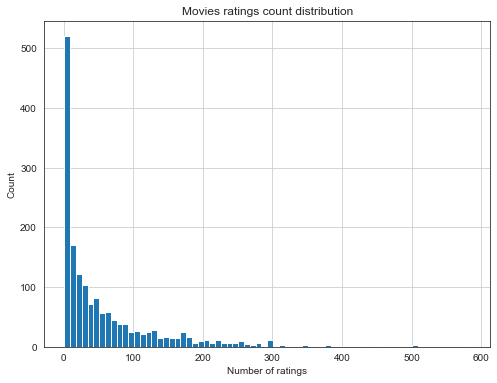

In [15]:
ratings['ratings_count'].hist(bins=70,figsize=(8,6))
plt.title('Movies ratings count distribution')
plt.xlabel("Number of ratings")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

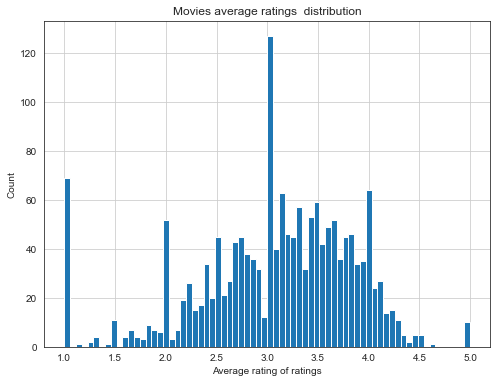

In [16]:
ratings['average_rating'].hist(bins=70,figsize=(8,6))
plt.title('Movies average ratings  distribution')
plt.xlabel("Average rating of ratings")
plt.ylabel("Count")

Distribution not very far from normal distribution though outliers can be noted.

### Check relationship between number of ratings and movie rating

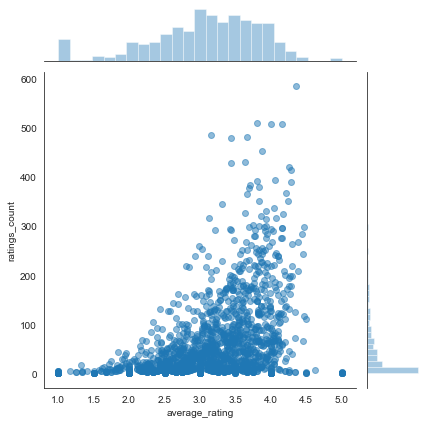

In [17]:
sns.jointplot(y='ratings_count',x='average_rating',data=ratings,alpha=0.5)

Average movie ratings and number of ratings seem to have a positive medium correlation.

In [18]:
## Get pearson correlation coefficient to reinforce scatter plot inference.
ratings['average_rating'].corr(ratings['ratings_count'])

0.430989107514642

## Recommendation system

In [19]:
## Create a matrix of user id, movie and rating
moviemat = df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.iloc[:5,:5].head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997)
user_id,,,,,
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN


In [20]:
## Glimpse top ten most viewed movies in catalogue
ratings.sort_values(by='ratings_count',ascending=False).head(10)

,title,average_rating,ratings_count
23,Star Wars (1977),4.359589,584
292,Contact (1997),3.803536,509
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
837,Liar Liar (1997),3.156701,485
412,"English Patient, The (1996)",3.656965,481
597,Scream (1996),3.441423,478
236,Toy Story (1995),3.878319,452
428,Air Force One (1997),3.631090,431
598,Independence Day (ID4) (1996),3.438228,429


### Input Favourite Movie

In [21]:
## Input favourite movie
favourite_movie = 'Toy Story (1995)'

### Select rating series of favourite movie from movie matrix

In [22]:
favourite_movie_user_ratings = moviemat[favourite_movie]

### Check correlation of favourite series with other series in the matrix

In [23]:
similar_to_favourite_movie = pd.DataFrame(moviemat.corrwith(favourite_movie_user_ratings),columns=['correlation'])
similar_to_favourite_movie.dropna(inplace=True)
similar_to_favourite_movie.head()

,correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728


### Order by correlation to get similar movies

In [24]:
similar_to_favourite_movie.sort_values(by='correlation',ascending=False,inplace=True)
similar_to_favourite_movie.head()

,correlation
title,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Reckless (1995),1.0
Ladybird Ladybird (1994),1.0
Infinity (1996),1.0
Albino Alligator (1996),1.0


### Append number of ratings dataset to filter for ratings threshold

Movies with low count of ratings are unreliable and may skew this recommender system

In [25]:
ratings_count.set_index('title',inplace=True)
ratings_count.head()

,ratings_count
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [26]:
## Merge data sets
correlation_counts_merge = similar_to_favourite_movie.join(ratings_count['ratings_count'])
correlation_counts_merge.head()

,correlation,ratings_count
title,,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5
Reckless (1995),1.0,8
Ladybird Ladybird (1994),1.0,4
Infinity (1996),1.0,6
Albino Alligator (1996),1.0,6


In [27]:
## Set ratings threshold
ratings_count_threshold = 100
correlation_counts_merge = correlation_counts_merge[correlation_counts_merge['ratings_count']>= 100].sort_values(by='correlation',
                                                                                                              ascending=False)


In [28]:
## Omit favourite movie from list and filter top ten recommendations
correlation_counts_merge.drop(index=favourite_movie,axis=0,inplace=True)
top_ten_recommendations = correlation_counts_merge.iloc[:10,:]
top_ten_recommendations

,correlation,ratings_count
title,,
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129
That Thing You Do! (1996),0.427936,176


# Conclusion

In [ ]:
The movie recommendation engine seems to work well as we can see it has recommended other animations such as beauty and the beast 